# Project 2, Part 7, Executive summary

University of California, Berkeley

Master of Information and Data Science (MIDS) program

w205 - Fundamentals of Data Engineering

Student: Stephanie Cabanela

Year: 2022

Semester: Spring

Section: 7


# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd
import psycopg2
from datetime import datetime as dt
import matplotlib.pyplot as plt

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  

Remember you can freely use any code from the labs. You do not need to cite code from the labs.

In [2]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

cursor = connection.cursor()

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)

# ELT and Data Exploration

## Check for Duplicates

In [9]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_id, sale_date, sub_total, tax, total_amount,
       count(*) number_of_duplicates
from stage_1_peak_sales
group by sale_id, sale_date, sub_total, tax, total_amount
having count(*) > 1
order by sale_id


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,sale_id,sale_date,sub_total,tax,total_amount,number_of_duplicates


In [14]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_id, location_id, name, street, city, state, zip,
       count(*) number_of_duplicates
from stage_1_peak_stores
group by sale_id, location_id, name, street, city, state, zip
having count(*) > 1
order by location_id


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,sale_id,location_id,name,street,city,state,zip,number_of_duplicates


In [17]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select customer_id, first_name, last_name, street, city, state, zip,
       count(*) number_of_duplicates
from stage_1_peak_customers
group by customer_id, first_name, last_name, street, city, state, zip
having count(*) > 1
order by customer_id


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,customer_id,first_name,last_name,street,city,state,zip,number_of_duplicates


In [20]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select sale_id, line_item_id, product_id, price, quantity, taxable,
       count(*) number_of_duplicates
from stage_1_peak_line_items
group by sale_id, line_item_id, product_id, price, quantity, taxable
having count(*) > 1
order by sale_id


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,sale_id,line_item_id,product_id,price,quantity,taxable,number_of_duplicates


## Check for Missing Values

In [26]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from stage_1_peak_sales
where stage_id is null or sale_id is null
    or sale_date is null or sub_total is null
    or tax is null or total_amount is null


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,stage_id,sale_id,sale_date,sub_total,tax,total_amount


In [28]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from stage_1_peak_stores
where stage_id is null
    or sale_id is null
    or location_id is null
    or name is null
    or street is null
    or city is null
    or state is null
    or zip is null

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,stage_id,sale_id,location_id,name,street,city,state,zip


In [30]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from stage_1_peak_customers
where stage_id is null
or sale_id is null
or customer_id is null
or first_name is null
or last_name is null
or street is null
or city is null
or state is null
or zip is null

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,stage_id,sale_id,customer_id,first_name,last_name,street,city,state,zip


In [33]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from stage_1_peak_line_items
where stage_id is null
or sale_id is null
or line_item_id is null
or product_id is null
or price is null
or quantity is null
or taxable is null

"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,stage_id,sale_id,line_item_id,product_id,price,quantity,taxable


## Check for Outliers

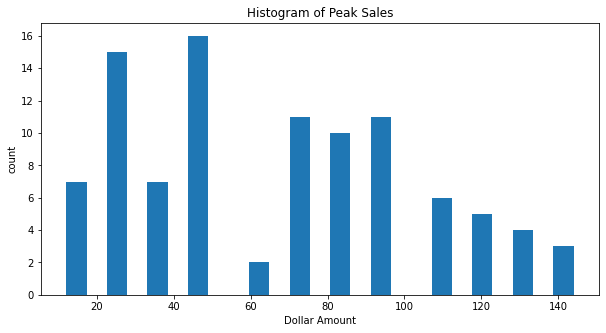

In [53]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select total_amount::numeric
from stage_1_peak_sales


"""

df_outliers_sales = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
plt.figure(figsize=(10,5))
plt.hist(df_outliers_sales['total_amount'], bins=25)
plt.title('Histogram of Peak Sales')
plt.xlabel('Dollar Amount')
plt.ylabel('count')
plt.show()

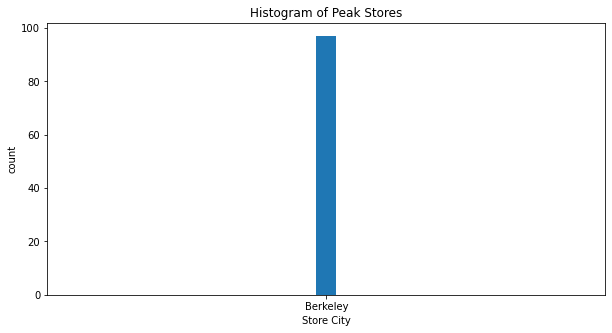

In [59]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select city
from stage_1_peak_stores


"""

df_outliers_sales = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
plt.figure(figsize=(10,5))
plt.hist(df_outliers_sales['city'], bins=25)
plt.title('Histogram of Peak Stores')
plt.xlabel('Store City')
plt.ylabel('count')
plt.show()

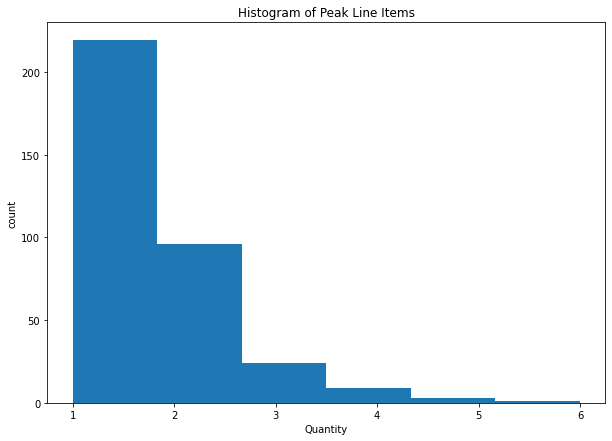

In [68]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select quantity::numeric
from stage_1_peak_line_items


"""

df_outliers_sales = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
plt.figure(figsize=(10,7))
plt.hist(df_outliers_sales['quantity'], bins=6)
plt.title('Histogram of Peak Line Items')
plt.xlabel('Quantity')
plt.ylabel('count')
plt.show()

In [30]:
rollback_before_flag = True
rollback_after_flag = True

query = """

select *
from stage_1_peak_line_items
where quantity::numeric = 6


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,stage_id,sale_id,line_item_id,product_id,price,quantity,taxable
0,328,5763728666,1,42314780,12,6,N


## Check for Violation of Referential Integrity

In [79]:
rollback_before_flag = True
rollback_after_flag = True

query  = """

select *
from stage_1_peak_stores
where sale_id not in (select sale_id from stage_1_peak_sales)


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,stage_id,sale_id,location_id,name,street,city,state,zip


In [83]:
rollback_before_flag = True
rollback_after_flag = True

query  = """

select *
from stage_1_peak_customers
where sale_id not in (select sale_id from stage_1_peak_sales)


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,stage_id,sale_id,customer_id,first_name,last_name,street,city,state,zip


In [87]:
rollback_before_flag = True
rollback_after_flag = True

query  = """

select *
from stage_1_peak_line_items
where sale_id not in (select sale_id from stage_1_peak_sales)


"""

my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)

,stage_id,sale_id,line_item_id,product_id,price,quantity,taxable


## Stage 2 Tables: Copy clean data into another staging table with actual data types

In [3]:
connection.rollback()

query = """

drop table if exists stage_2_peak_sales;
drop table if exists stage_2_peak_stores;
drop table if exists stage_2_peak_customers;
drop table if exists stage_2_peak_line_items;

"""

cursor.execute(query)

connection.commit()

In [4]:
connection.rollback()

query = """

create table stage_2_peak_sales (
  stage_id serial,
  sale_id numeric(10),
  sale_date date,
  sub_total numeric(3),
  tax numeric(2),
  total_amount numeric(3)
);

create table stage_2_peak_stores (
  stage_id serial,
  sale_id numeric(10),
  location_id numeric(5),
  name varchar(18),
  street varchar(32),
  city varchar(32),
  state varchar(2),
  zip varchar(5)
);

create table stage_2_peak_customers (
  stage_id serial,
  sale_id numeric(10),
  customer_id numeric(7),
  first_name varchar(32),
  last_name varchar(32),
  street varchar(32),
  city varchar(32),
  state varchar(2),
  zip varchar(5)
);

create table stage_2_peak_line_items (
  stage_id serial,
  sale_id numeric(10),
  line_item_id numeric(3),
  product_id numeric(8),
  price numeric(2),
  quantity numeric(3),
  taxable varchar(1)
);

"""

cursor.execute(query)

connection.commit()

In [5]:
connection.rollback()

query = """

insert into stage_2_peak_sales
(stage_id, sale_id, sale_date, sub_total, tax, total_amount)
select stage_id,
  sale_id::numeric,
  sale_date::date,
  sub_total::numeric,
  tax::numeric,
  total_amount::numeric
from stage_1_peak_sales
order by stage_id;

"""

cursor.execute(query)

connection.commit()

In [6]:
connection.rollback()

query = """

insert into stage_2_peak_stores
(stage_id, sale_id, location_id, name, street, city, state, zip)
select stage_id,
  sale_id::numeric,
  location_id::numeric,
  name,
  street,
  city,
  state,
  zip
from stage_1_peak_stores
order by stage_id;

"""

cursor.execute(query)

connection.commit()

In [7]:
connection.rollback()

query = """

insert into stage_2_peak_customers
(stage_id, sale_id, customer_id, first_name, last_name, street, city, state, zip)
select stage_id,
  sale_id::numeric,
  customer_id::numeric,
  first_name,
  last_name,
  street,
  city,
  state,
  zip
from stage_1_peak_customers
order by stage_id;

"""

cursor.execute(query)

connection.commit()

In [8]:
connection.rollback()

query = """

insert into stage_2_peak_line_items
(stage_id, sale_id, line_item_id, product_id, price, quantity, taxable)
select stage_id,
  sale_id::numeric,
  line_item_id::numeric,
  product_id::numeric,
  price::numeric,
  quantity::numeric,
  taxable
from stage_1_peak_line_items
order by stage_id;

"""

cursor.execute(query)

connection.commit()

# 2.7.1 Executive summary

Write an executive summary.  

The summary should be the equivalent to 3/4 to 1 page using standard fonts, spacing, and margins. 

You may write about any aspect (or aspects).  Basically figure out what you think is the most import aspect (or aspects) that the executives would want to know.  

It could be related to the process itself. Such as how you were able to take a dataset, load it into staging tables, and get analytics very quickly, instead of a months long traditional waterfall process. 

It could be related to the preliminary analytics.  Any insights you gained.  Possible comparison to the analytics from project 1.  Do the delivery sales have different patterns or the same patterns as in store sales?  Is this a good way to grow sales? etc.

It could be related to both.

You are not required to write any queries nor create any data visualizations.  However, you may want to include some to enhance and add quality to your submission.  Submissions with these tend to be higher quality, although, not always.

You may use any number of code cells and/or markdown cells. 

You may alternate between code cells and markdown cells.  That is perfectly fine.  It is understood that before we present it, an editor would pull out the text, results of queries, and data visualizations.

## Executive Summary: Insights from Peak Deliveries Data and The ELT Process

Our data analytics can only be as good as the data it originated from. With the traditional ETL-Waterfall framework, we would take weeks or months to develop code to extract, transform, and load the dataset based on specifications without looking at the data. If we find our data to be inappropriate, incorrect, or insufficient, this will undermine our analytics. Instead, taking a look at the actual data early using ELT with CI/CD practices allows us to identify these gaps and address them quickly, which this POC shows.

In this POC, we evaluated the JSON data provided by Peak Deliveries using ELT. This process comprised of the following steps:

* Stage 1: Loaded data into staging tables and performed data exploration to check for dirty data.
| Data issue | Records affected |
| :- | :- |
| Invalid data types | 0 records |
| Duplicates | 0 records |
| Missing values | 0 records |
| Outliers | 1 record with quantity = 6 in `peak_line_items` table |
| Violation of referential integrity | 0 records |
| Misspellings | 13 records in `peak_customers` table |

* Stage 2: Loaded data into more staging tables and performed preliminary analytics.

### Preliminary Analytics on Peak Deliveries Data
The data cleansing process revealed that data retrieved from Peak Deliveries for this POC was relatively clean. We performed data cleansing, then data exploration, and then preliminary analytics. Since the Peak Deliveries sales data is limited to the Berkeley store on the date October 3, 2020, we only look at AGM sales data at the Berkeley store on the same date to have a fair comparison in our analysis. Despite the data’s limited scope, initial analysis revealed some insights that may be valuable to AGM business decisions moving forward.

In [219]:
rollback_before_flag = True
rollback_after_flag = True

query  = """

with agm_profit as (
        select sum(sa.total_amount) as agm_total_dollar_sales
        from stores as st
            join sales as sa on st.store_id = sa.store_id
        where sa.sale_date = '2020-10-03' and st.city = 'Berkeley'
    ),
    peak_net_profit as (
        select sum(total_amount)*(0.18) as peak_cut,
            sum(total_amount)*(1-0.18) as agm_cut
        from stage_2_peak_sales
    )
select agm_total_dollar_sales, agm_cut, peak_cut
from agm_profit cross join peak_net_profit

"""

total_dollars_df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
total_dollars_df

,agm_total_dollar_sales,agm_cut,peak_cut
0,96708,5313.6,1166.4


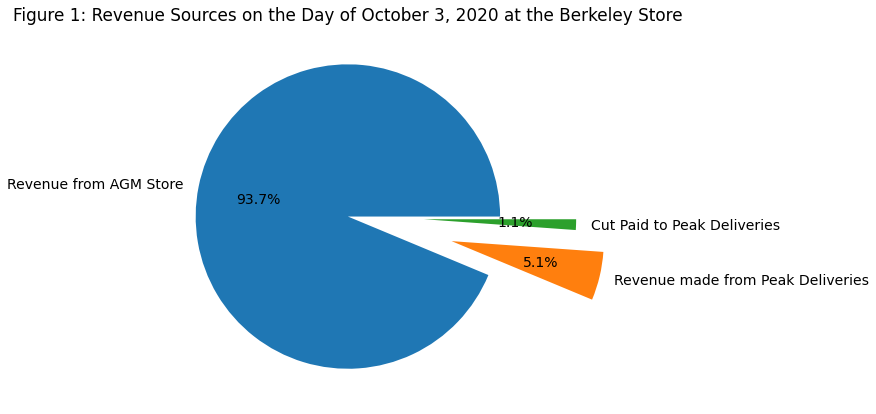

In [220]:
agm_store_revenue = total_dollars_df.iloc[0][0]
peak_revenue = total_dollars_df.iloc[0][1]
peak_cut = total_dollars_df.iloc[0][2]

values = [agm_store_revenue, peak_revenue, peak_cut]
labelS_df = ['Revenue from AGM Store', 'Revenue made from Peak Deliveries', 'Cut Paid to Peak Deliveries']

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
plt.figure(figsize=(7,7))
plt.rcParams.update({'font.size' : 14})
plt.pie(values, labels=labelS_df, autopct='%1.1f%%', explode=(0,0.7,0.5))
plt.title('Figure 1: Revenue Sources on the Day of October 3, 2020 at the Berkeley Store')
plt.show()

Figure 1 above shows that of the total revenue of \\$96,708 made on 10/03/2020 at the Berkeley store, 5.1\% of it was \\$5,313.60 of revenue made from AGM’s share of delivery sales. 1.1\% was paid to Peak Deliveries, and the rest of the revenue was made from in-store sales. Although the sales from Peak Deliveries provided a revenue boost, 5.1\% of revenue from delivery might be too small to justify the cut paid to Peak Deliveries. Further analysis will need to be done to evaluate this, but Figure 1 provides a good starting point.

In [254]:
rollback_before_flag = True
rollback_after_flag = True

query  = """

with agm_avg_meals_per_sale as (
        select round(sum(temp.meals_per_sale)/count(temp.sale_id), 2) as agm_avg_meals_per_sale
        from(select sa.sale_id, sum(li.quantity) as meals_per_sale
            from stores as st
                join sales as sa on st.store_id = sa.store_id
                join line_items as li on sa.store_id = li.store_id and sa.sale_id = li.sale_id
                where sa.sale_date = '2020-10-03' and st.city = 'Berkeley'
                group by sa.sale_id) as temp
    ),
    peak_avg_meals_per_sale as (
        select round(sum(temp.meals_per_sale)/count(temp.sale_id), 2) as peak_avg_meals_per_sale
        from(select sale_id, sum(quantity) as meals_per_sale
            from stage_2_peak_line_items
            group by sale_id) as temp
    )
select agm_avg_meals_per_sale, peak_avg_meals_per_sale
from agm_avg_meals_per_sale cross join peak_avg_meals_per_sale

"""

df_avg_meals_per_sale = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df_avg_meals_per_sale

,agm_avg_meals_per_sale,peak_avg_meals_per_sale
0,5.17,5.57


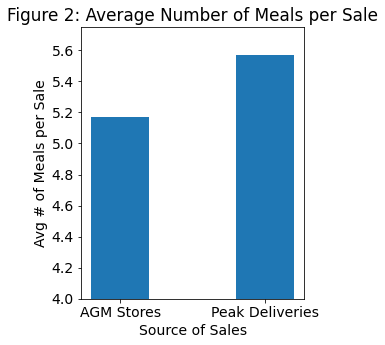

In [253]:
agm_avg_meals_per_sale = df_avg_meals_per_sale.iloc[0][0]
peak_avg_meals_per_sale = df_avg_meals_per_sale.iloc[0][1]

values = [agm_avg_meals_per_sale, peak_avg_meals_per_sale]
labels_df = ['AGM Stores', 'Peak Deliveries']

plt.figure(figsize=(4,5))
plt.bar(labels_df, values, width=0.4)
plt.title('Figure 2: Average Number of Meals per Sale')
plt.xlabel('Source of Sales')
plt.ylabel('Avg # of Meals per Sale')
plt.ylim([4,5.75])
plt.show()

Figure 2 above shows that delivery sales have a slightly higher average number of meals per sale (5.57) compared to in-store sales (5.17). This suggests that the convenience of deliveries may be a factor that encourages customers to order more meals per sale. Further research will need to be done to study factors influencing the quantity of meals per sale, and Figure 2 provides a good starting point.

### Conclusion
Ideally we would use ELT with CI/CD, in which we repeat the process of retrieving the data, loading it into staging tables, exploring the data, and delivering analytics. We did the first iteration in our POC. Using ELT with CI/CD brings us the following benefits:
* **With better data, we get better analytics.** By taking a look at the actual data, we can ensure that the data meets our needs and identify any gaps that we can communicate early on with Peak Deliveries. This gives us higher quality data to work with and will yield helpful insights from the analytics.
* **We get results faster.** As shown with the POC, we were able to get preliminary analytics with the actual data within a matter of days (as opposed to the weeks or months we would have spent using the waterfall approach).
* **We spend less money and resources.** With the shorter ELT timeline, we spend less of our budget.

The goal of our partnership with Peak Deliveries is ultimately to increase sales, grow our customer base, and increase profitability. The ELT with CI/CD approach can help us maximize our return on investment and reach our goal because it allows us to increase data quality and use our time and resources more efficiently.